In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
%matplotlib inline

In [2]:
meta = pd.read_csv("..//data//potatometadata_forClaudia.csv")
meta.head()

,FieldID,Experiment,field name,diffCSscore,Mean.Control.Microbe,Mean.LowN.Microbe,varCtub,varNtub,varCSscore,invVar_Ctub,...,cladediv0.55,claderich0.6,cladediv0.6,claderich0.7,cladediv0.7,claderich0.8,cladediv0.8,asvrich,asvdiv,PD
0,1,2015,CF1,1.280556,247.26153,218.67840,75.443121,551.385549,1.148148,0.013255,...,4.835654,339,4.887446,370,5.087528,395,5.226187,400,5.230529,31.699375
1,2,2015,CF2,0.762103,221.60938,216.76044,2061.830163,329.386189,0.833558,0.000485,...,4.842094,321,4.898134,337,5.144046,354,5.209358,355,5.211097,26.603089
2,3,2015,CF4,1.089286,260.05795,209.17201,382.961433,853.913357,0.317602,0.002611,...,4.153512,286,4.232498,310,4.453618,340,4.567909,340,4.567909,30.883599
3,4,2015,CF5,3.208333,238.36716,233.20952,452.336408,214.991855,9.159722,0.002211,...,4.511198,249,4.570936,264,4.752686,274,4.784318,274,4.784318,23.384369
4,5,2015,DO1,2.450000,286.36653,252.37100,941.434313,249.128362,4.196667,0.001062,...,4.403219,142,4.414700,154,4.602408,159,4.638410,159,4.638410,19.468832


In [3]:
taxa = pd.read_csv("..//data//potatorar_forsubmission.csv")
taxa.columns.values[0] = "FieldID"
taxa = taxa.rename(columns = {'FieldID':'FieldID'})
taxa.head()

,FieldID,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.48a689917bdd4a6d9d3e8a438d88409a,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7375b22789de1fc3f7165b84a2f78199,...,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.fda7381785bd70780f57b54975ec27ad,X.4092452cccf123b62ba6e23278b18e82,X.b31710a66252a477148f8e3bdfb1505b,X.bafb89b007d809438da956e6ed14f635,X.9ea9bd20eea275e169864132dda04303
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0


In [4]:
# covert field id to index, make it convenient to calculate euclidean distance
taxa_2 = taxa.set_index('FieldID')

# Preprocessing

In [5]:
import Utils

## update the Utils library
import importlib
importlib.reload(Utils)

<module 'Utils' from 'C:\\Users\\CSY\\Desktop\\potato-lankau\\scripts\\Utils.py'>

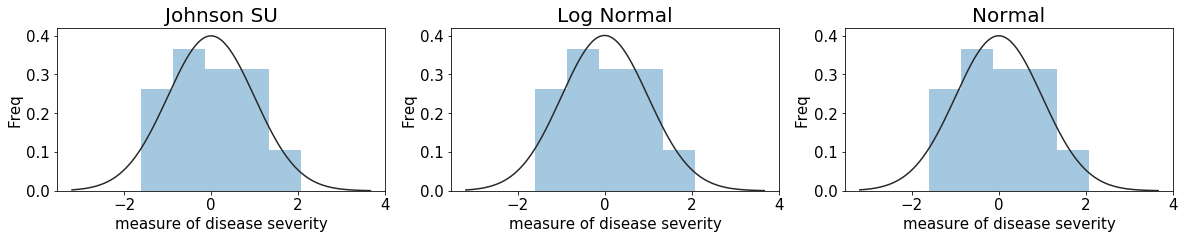

In [6]:
yt_disease, gamma, eta, epsilon, lbda = Utils.johnson_transform(meta.diffCSscore)
Utils.check_dist(yt_disease, xlab="measure of disease severity")

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

## Using only meta data

In [10]:
# drop non-numeric column
meta_clean = meta.drop(['field name', 'diffCSscore'], axis=1)
# In the new field, experiment conducted in 2015 is labeled as 0 whereas in 2017 as 1
meta_clean['Experiment'] = meta_clean['Experiment'].replace(2015, 0)
meta_clean['Experiment'] = meta_clean['Experiment'].replace(2017, 1)
# drop all column related to yield
yld_list = ['Mean.Control.Microbe', 'Mean.LowN.Microbe', 'varCtub', 'varNtub', 'invVar_Ctub',
           'invVar_Ntub', 'Std.Err.Mean.Control.Microbe', 'Std.Err.Mean.LowN.Microbe', ]
disease_unwanted = ['varCSscore', 'invVar_Csscore', 'seCSscore']
meta_clean = meta_clean.drop(yld_list, axis=1)
meta_clean = meta_clean.drop(disease_unwanted, axis=1)
meta_clean_2 = meta_clean.set_index('FieldID')
meta_clean_2.head(1)

,Experiment,claderich0.1,cladediv0.1,claderich0.15,cladediv0.15,claderich0.2,cladediv0.2,claderich0.25,cladediv0.25,claderich0.3,...,cladediv0.55,claderich0.6,cladediv0.6,claderich0.7,cladediv0.7,claderich0.8,cladediv0.8,asvrich,asvdiv,PD
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,22,2.276874,40,2.601291,69,2.899249,118,3.239466,167,...,4.835654,339,4.887446,370,5.087528,395,5.226187,400,5.230529,31.699375


In [11]:
meta_clean_2_unnormalized = meta_clean_2
meta_clean_2, mu_meta, sd_meta = Utils.normalization(meta_clean_2)
xtrain_meta_d, xval_meta_d, ytrain_meta_d, yval_meta_d = train_test_split(meta_clean_2, yt_disease, test_size = 0.2, random_state = 1)

In [12]:
ytrain_d_orig = Utils.johnson_inverse(ytrain_meta_d, gamma, eta, epsilon, lbda)
yval_d_orig = Utils.johnson_inverse(yval_meta_d, gamma, eta, epsilon, lbda)

## Using only taxa data

In [13]:
taxa_clean = taxa.loc[:, (taxa != 0).any(axis=0)]  # drop columns contain only 0
print(taxa_clean.shape)

taxa_clean_2 = taxa_clean.set_index('FieldID')
taxa_clean_2.head(2)

(26, 9892)


,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7d14d3768b5e662b5d149e118eb1d769,X.9c2f2389f76ceacd02fae2f0bfbd0afb,X.9fa7366dd5f14f5a131b874549c44696,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_taxa, mu_taxa, sd_taxa = Utils.normalization(taxa_clean_2)
X_taxa = pd.concat([meta_clean['Experiment'], X_taxa.reset_index()], axis=1)
X_taxa = X_taxa.set_index('FieldID')
print(X_taxa.shape)
X_taxa.head()

(26, 9892)


,Experiment,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7d14d3768b5e662b5d149e118eb1d769,X.9c2f2389f76ceacd02fae2f0bfbd0afb,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
2,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
3,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
4,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
5,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [15]:
xtrain_taxa_d, xval_taxa_d, ytrain_taxa_d, yval_taxa_d = train_test_split(X_taxa, yt_disease, test_size = 0.2, random_state = 1)

## combine two data set

In [17]:
clean = pd.concat([meta_clean_2.drop(['Experiment'], axis=1), taxa_clean_2], axis=1)
total, mu_total, sd_total = Utils.normalization(clean)
total = pd.concat([X_taxa.Experiment, total], axis=1)
total.head()

,Experiment,claderich0.1,cladediv0.1,claderich0.15,cladediv0.15,claderich0.2,cladediv0.2,claderich0.25,cladediv0.25,claderich0.3,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,-0.816933,-0.834312,-0.438802,-0.613301,-0.372269,-0.974633,-0.379977,-1.017165,-0.500798,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
2,0,-1.141212,-1.247924,-0.969446,-1.514288,-0.830749,-1.414816,-0.543905,-1.040303,-0.536069,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
3,0,-0.816933,-1.762260,-0.505133,-1.947435,-0.626980,-1.921612,-0.489262,-1.679134,-0.559582,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
4,0,-0.979072,-1.608700,-1.035777,-2.031462,-0.830749,-1.892107,-0.784333,-1.656125,-0.683030,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
5,0,-0.816933,0.644290,-1.035777,0.143113,-0.754335,0.061178,-0.838975,-0.509260,-0.918167,...,-0.196116,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [18]:
xtrain_d, xval_d, ytrain_d, yval_d = train_test_split(total, yt_disease, test_size = 0.2, random_state = 1)

# XGBoost

In [21]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost as xgb

In [20]:
# from sklearn import cross_validation, metrics

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [67]:
def xgbfit(alg, X, y, xTest=None, yTest=None, useTrainCV=True, cv_folds=5, early_stopping_rounds=50, show_progress=False):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, show_stdv=show_progress)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='rmse')
        
    #Predict data set:
    xtrain_pred = alg.predict(X)
    train_pred_orig = Utils.johnson_inverse(xtrain_pred, gamma, eta, epsilon, lbda)
    
    xTest_pred = alg.predict(xTest)
    test_pred_orig = Utils.johnson_inverse(xTest_pred, gamma, eta, epsilon, lbda)    
        
    #Print model report:
    mse_train = mean_squared_error(train_pred_orig, ytrain_d_orig)
    mse_val = mean_squared_error(test_pred_orig, yval_d_orig)
    print("\nModel Report")
    print("RMSE for traning set: {}".format(np.sqrt(mse_train)))
    print("RMSE for validation set: {}".format(np.sqrt(mse_val)))
    
    plt.figure(figsize=(9, 3))
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    tmp = feat_imp[:21]
    tmp.plot(kind='bar', color="blue")
    plt.title('Feature Importances (limited to first 20)', fontsize=20)
    plt.ylabel('Feature Importance Score', fontsize=15)
    
    return train_pred_orig, xTest_pred, feat_imp

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.25728020557110465
RMSE for validation set: 1.616841435662524


(array([0.1629163 , 0.99641883, 2.335157  , 1.1143631 , 2.3593955 ,
        2.2970295 , 1.3740143 , 0.9641489 , 0.05561459, 0.818606  ,
        0.90447104, 1.2675515 , 1.6661063 , 0.10086799, 1.4721414 ,
        2.321175  , 3.2809825 , 4.5735164 , 1.6307477 , 1.6928061 ],
       dtype=float32),
 array([ 0.04891434, -0.05472028, -1.0561345 ,  0.30574518,  0.24035639,
         0.7708427 ], dtype=float32))

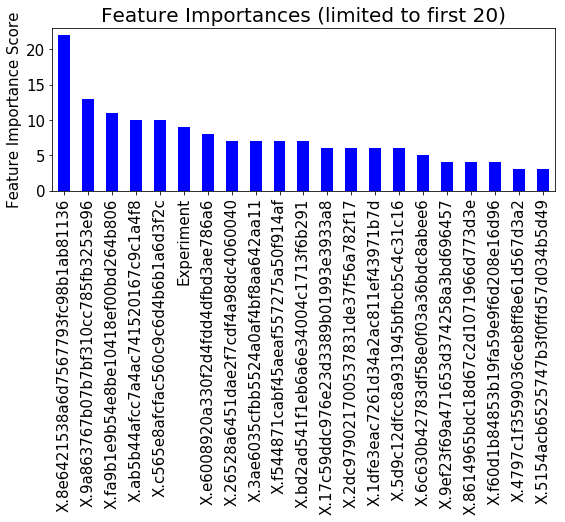

In [41]:
xgb1 = XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=2)
xgbfit(xgb1, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

## tuning tree based param

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
tree_param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

TypeError: Singleton array array(XGBRegressor cannot be considered a valid collection.
issue did not solve  

Version:
python 3.7.1  
sklearn 0.20.1  
xgboost 0.90  

Reference:  
https://stackoverflow.com/questions/59291277/error-when-using-fit-params-with-gridsearchcv-and-some-params-are-singletons/59291616#59291616

In [52]:
gd_search1 = GridSearchCV(estimator=xgb1, param_grid=tree_param_test1, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)

gd_search1.fit(xgb1, xtrain_taxa_d, ytrain_taxa_d)
gd_search1.grid_scores_, gd_search1.best_params_, gd_search1.best_score_

TypeError: Singleton array array(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=39,
       n_jobs=1, nthread=4, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2, silent=None,
       subsample=0.8, verbosity=1), dtype=object) cannot be considered a valid collection.

## tuning learning rate

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.16110089499531932
RMSE for validation set: 1.6389298959744263


(array([0.06155288, 1.0111257 , 2.37152   , 1.1067306 , 2.4050684 ,
        2.2991505 , 1.368842  , 0.9231545 , 0.01527601, 0.795624  ,
        0.8658935 , 1.2813183 , 1.6567384 , 0.06689191, 1.4376465 ,
        2.3045955 , 3.3640537 , 4.9747195 , 1.6255249 , 1.6679889 ],
       dtype=float32),
 array([ 0.03640109, -0.18614954, -1.1470786 ,  0.2035025 ,  0.04393825,
         0.75168836], dtype=float32))

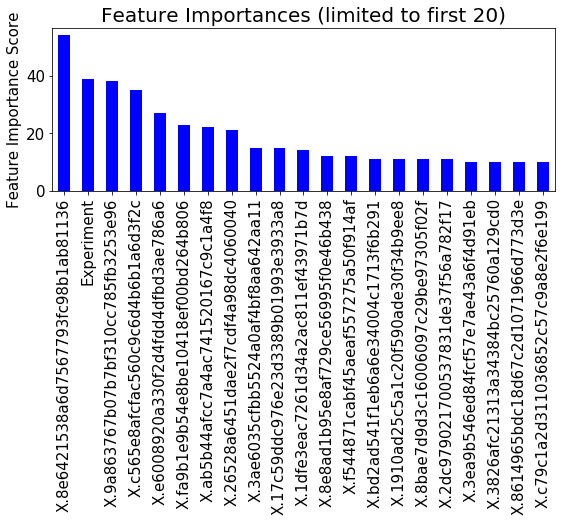

In [54]:
xgb2 = XGBRegressor(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=2)
xgbfit(xgb2, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.5217170711070214
RMSE for validation set: 1.5445298470133138


(array([0.35803843, 1.1412996 , 2.1436505 , 1.185043  , 2.1624012 ,
        2.1661482 , 1.4259144 , 1.1867515 , 0.29474843, 1.010789  ,
        1.0605739 , 1.3482245 , 1.6717635 , 0.34845626, 1.5125979 ,
        2.2510147 , 3.034759  , 3.5649166 , 1.7125732 , 1.7241493 ],
       dtype=float32),
 array([ 0.17965797, -0.03991592, -0.78274345,  0.35857922, -0.01473099,
         0.68638664], dtype=float32))

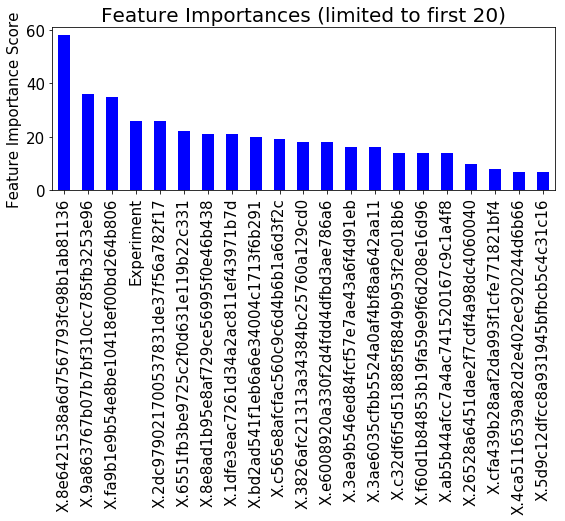

In [55]:
xgb3 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=2)
xgbfit(xgb3, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

## tuning # of estimators

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.6111613077764921
RMSE for validation set: 1.5120048410383296


(array([0.49325848, 1.2095474 , 2.1073523 , 1.2515339 , 2.112124  ,
        2.149156  , 1.4634713 , 1.2716182 , 0.42231834, 1.0863689 ,
        1.1282412 , 1.3751777 , 1.6916784 , 0.48615575, 1.5388597 ,
        2.2287412 , 2.9080577 , 3.2752895 , 1.748046  , 1.7614714 ],
       dtype=float32),
 array([ 0.19987378,  0.01915312, -0.64148486,  0.39900005,  0.00440633,
         0.65702546], dtype=float32))

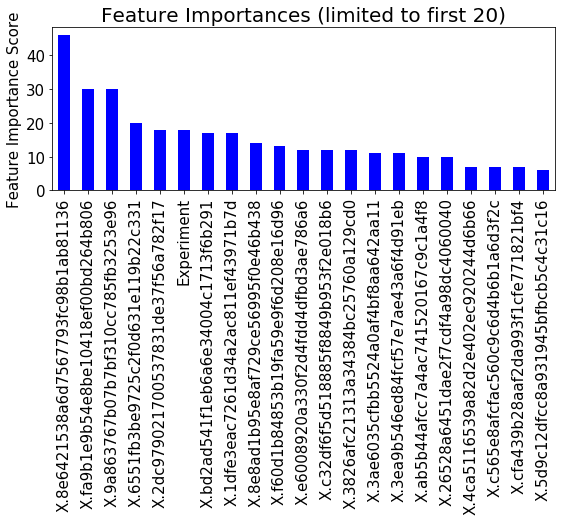

In [56]:
xgb4 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=80,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=2)
xgbfit(xgb4, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.7096030151900672
RMSE for validation set: 1.4997661294148517


(array([0.66894937, 1.2886926 , 2.0703406 , 1.3198014 , 2.0659723 ,
        2.1329465 , 1.5239269 , 1.358786  , 0.6155665 , 1.18425   ,
        1.2246355 , 1.4208158 , 1.734759  , 0.6720904 , 1.570619  ,
        2.1903415 , 2.649764  , 3.0340362 , 1.7988366 , 1.7604009 ],
       dtype=float32),
 array([ 0.24207741,  0.08438781, -0.42031485,  0.40794837,  0.06676722,
         0.64068925], dtype=float32))

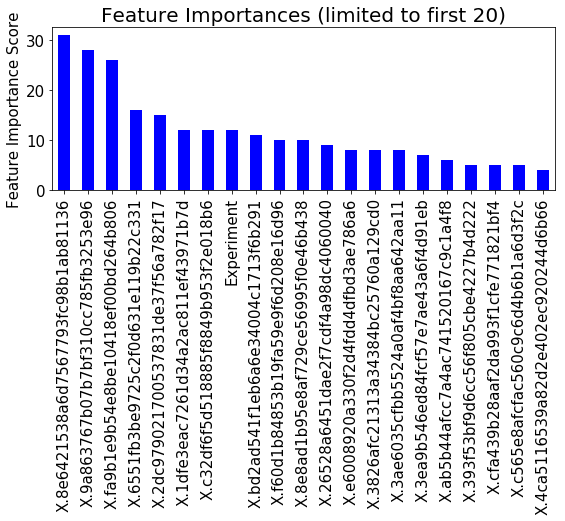

In [57]:
xgb5 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=2)
xgbfit(xgb5, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.7706162743289754
RMSE for validation set: 1.4943540594679918


(array([0.7927804 , 1.339265  , 2.0354304 , 1.3678452 , 2.0174913 ,
        2.1058106 , 1.5764788 , 1.4243463 , 0.7399719 , 1.2375587 ,
        1.2839829 , 1.4552284 , 1.7497307 , 0.79246056, 1.5846089 ,
        2.1634874 , 2.5815187 , 2.8853078 , 1.8178357 , 1.7787796 ],
       dtype=float32),
 array([ 0.28080976,  0.12519208, -0.28445405,  0.40967044,  0.0753563 ,
         0.63562375], dtype=float32))

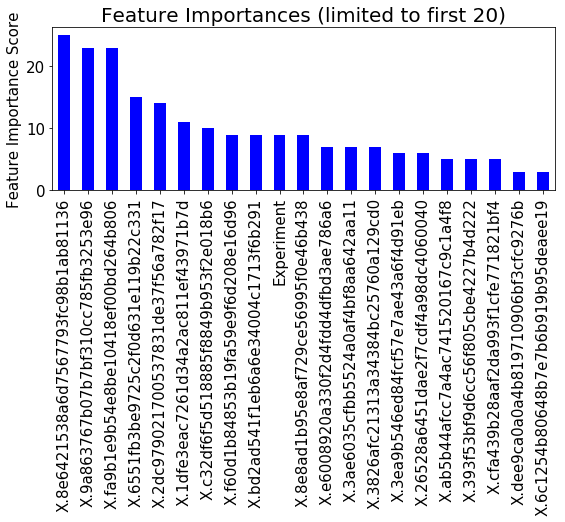

In [58]:
xgb6 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=50,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    seed=2)
xgbfit(xgb6, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

## Regularization

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.7632678899781353
RMSE for validation set: 1.4676834965317263


(array([0.76658523, 1.3204798 , 2.0735545 , 1.3716642 , 2.0832438 ,
        2.11769   , 1.5323337 , 1.3841537 , 0.70689166, 1.1904162 ,
        1.2078575 , 1.409958  , 1.7286879 , 0.7317405 , 1.5916754 ,
        2.1667    , 2.5428162 , 2.8516755 , 1.7916418 , 1.7376179 ],
       dtype=float32),
 array([ 0.19901127,  0.12328997, -0.28773433,  0.43422204,  0.0316509 ,
         0.65782785], dtype=float32))

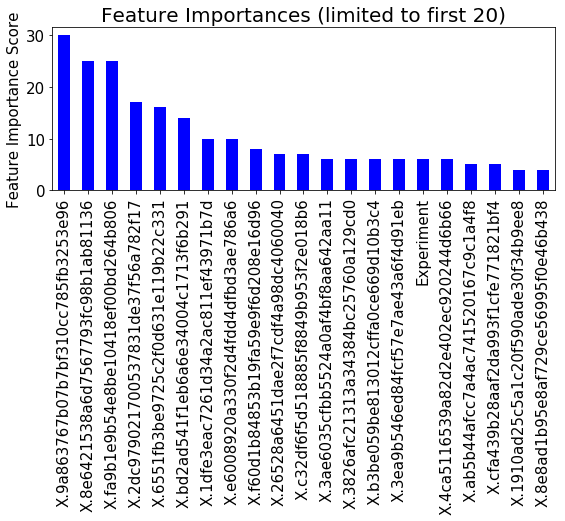

In [60]:
xgb7 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    reg_lambda=1.5,
    seed=2)
xgbfit(xgb7, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.8494183162984499
RMSE for validation set: 1.513930874555176


(array([0.9222404 , 1.2614375 , 2.1603847 , 1.3604163 , 2.0603027 ,
        2.0795794 , 1.575174  , 1.3758291 , 0.9361812 , 1.1507424 ,
        1.1875526 , 1.4501411 , 1.7422141 , 0.91627157, 1.6680363 ,
        2.1159315 , 2.3476582 , 2.603188  , 1.8283404 , 1.7402483 ],
       dtype=float32),
 array([ 0.21058214,  0.02401939, -0.06877875,  0.33740902, -0.03793103,
         0.65128845], dtype=float32))

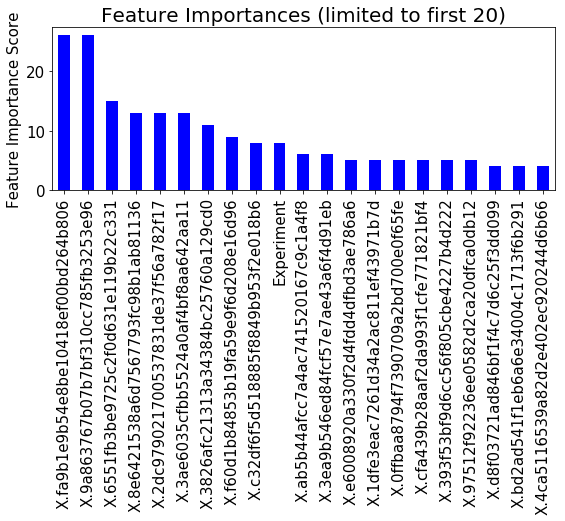

In [61]:
xgb8 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    reg_lambda=3,
    seed=2)
xgbfit(xgb8, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.9202356630226942
RMSE for validation set: 1.5267855403453143


(array([1.0961262, 1.2267507, 2.1492448, 1.3465799, 1.9876548, 2.1225424,
        1.549791 , 1.4021765, 1.08509  , 1.1422209, 1.1406671, 1.4581329,
        1.7518383, 1.0751058, 1.7039033, 2.1395912, 2.2279186, 2.414363 ,
        1.8893503, 1.7691988], dtype=float32),
 array([ 0.19973087,  0.08239543,  0.1101723 ,  0.26921928, -0.01068932,
         0.6789976 ], dtype=float32))

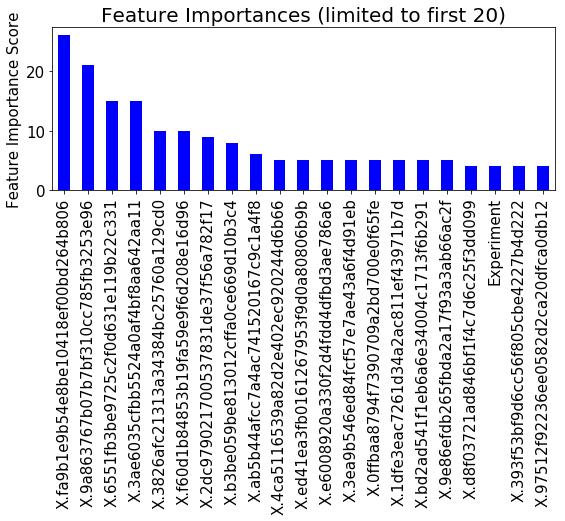

In [62]:
xgb9 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    reg_lambda=5,
    seed=2)
xgbfit(xgb9, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.8912649377002604
RMSE for validation set: 1.5138265939593551


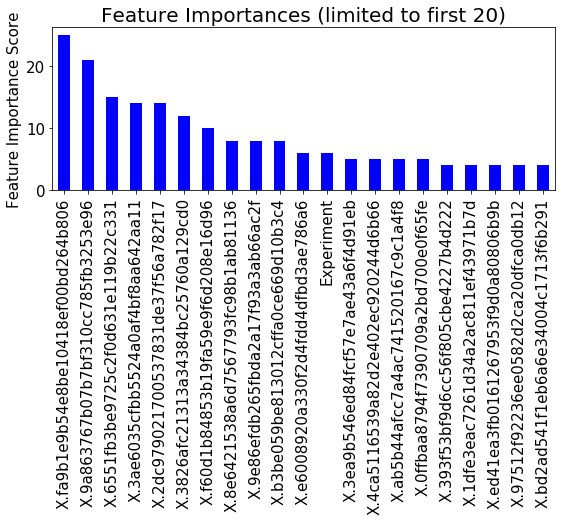

In [73]:
xgb10 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    reg_lambda=4,
    seed=2)
train_pred_, val_pred_, xgb_importance_taxa = xgbfit(xgb10, xtrain_taxa_d, ytrain_taxa_d, xval_taxa_d, yval_taxa_d)

In [74]:
xgb_importance_taxa[xgb_importance_taxa > 5]

X.fa9b1e9b54e8be10418ef00bd264b806    25
X.9a863767b07b7bf310cc785fb3253e96    21
X.6551fb3be9725c2f0d631e119b22c331    15
X.3ae6035cfbb5524a0af4bf8aa642aa11    14
X.2dc979021700537831de37f56a782f17    14
X.3826afc21313a34384bc25760a129cd0    12
X.f60d1b84853b19fa59e9f6d208e16d96    10
X.8e6421538a6d7567793fc98b1ab81136     8
X.9e86efdb265fbda2a17f93a3ab66ac2f     8
X.b3be059be813012cffa0ce669d10b3c4     8
X.e6008920a330f2d4fdd4dfbd3ae786a6     6
Experiment                             6
dtype: int64

The xgboosting does not improve our prediction much under the circumstance of small sample size. However, it does refelect some important features that we should pay attention to in the future. 

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.775530298323083
RMSE for validation set: 1.478317435957033


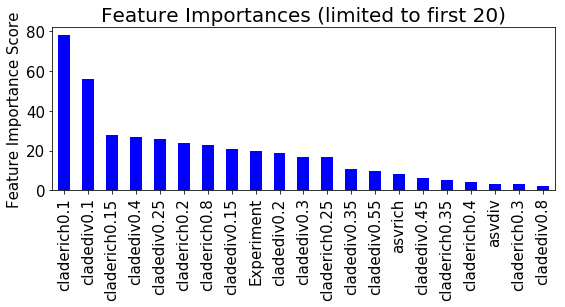

In [75]:
xgb11 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    reg_lambda=1,
    seed=2)
train_pred_, val_pred_, xgb_importance_meta1 = xgbfit(xgb11, xtrain_meta_d, ytrain_meta_d, xval_meta_d, yval_meta_d)

In [76]:
xgb_importance_meta1[xgb_importance_meta1 > 5]

claderich0.1     78
cladediv0.1      56
claderich0.15    28
cladediv0.4      27
cladediv0.25     26
claderich0.2     24
claderich0.8     23
cladediv0.15     21
Experiment       20
cladediv0.2      19
cladediv0.3      17
claderich0.25    17
cladediv0.35     11
cladediv0.55     10
asvrich           8
cladediv0.45      6
dtype: int64

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.900126960725201
RMSE for validation set: 1.4242095022361985


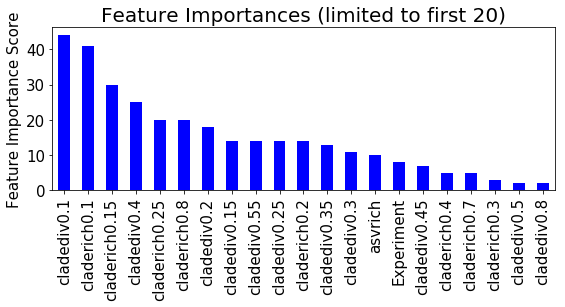

In [77]:
xgb12 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    reg_lambda=2.5,
    seed=2)
train_pred_, val_pred_, xgb_importance_meta2 = xgbfit(xgb12, xtrain_meta_d, ytrain_meta_d, xval_meta_d, yval_meta_d)

In [78]:
xgb_importance_meta2[xgb_importance_meta2 > 5]

cladediv0.1      44
claderich0.1     41
claderich0.15    30
cladediv0.4      25
claderich0.25    20
claderich0.8     20
cladediv0.2      18
cladediv0.15     14
cladediv0.55     14
cladediv0.25     14
claderich0.2     14
cladediv0.35     13
cladediv0.3      11
asvrich          10
Experiment        8
cladediv0.45      7
dtype: int64

C:\Users\CSY\Anaconda3\lib\site-packages\xgboost-0.90-py3.7.egg\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Model Report
RMSE for traning set: 0.9884355484729502
RMSE for validation set: 1.4153806248372063


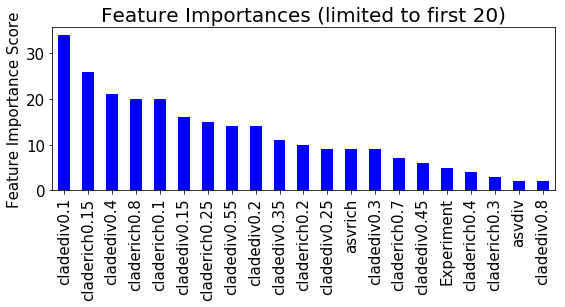

In [79]:
xgb13 = XGBRegressor(
    learning_rate=0.02,
    n_estimators=60,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'reg:squarederror',
    nthread=4,
    scale_pos_weight=1,
    reg_lambda=4.5,
    seed=2)
train_pred_, val_pred_, xgb_importance_meta3 = xgbfit(xgb13, xtrain_meta_d, ytrain_meta_d, xval_meta_d, yval_meta_d)

In [86]:
xgb_importance_meta3[xgb_importance_meta3 > 5]

cladediv0.1      34
claderich0.15    26
cladediv0.4      21
claderich0.8     20
claderich0.1     20
cladediv0.15     16
claderich0.25    15
cladediv0.55     14
cladediv0.2      14
cladediv0.35     11
claderich0.2     10
cladediv0.25      9
asvrich           9
cladediv0.3       9
claderich0.7      7
cladediv0.45      6
dtype: int64

In [80]:
# extract the same element in different series
def extra_same_elem(lst, *lsts):
    iset = set(lst)
    for li in lsts:
        s = set(li)
        iset = iset.intersection(s)
    return list(iset)

In [83]:
xgb_importance_meta1[xgb_importance_meta1 > 5].index

Index(['claderich0.1', 'cladediv0.1', 'claderich0.15', 'cladediv0.4',
       'cladediv0.25', 'claderich0.2', 'claderich0.8', 'cladediv0.15',
       'Experiment', 'cladediv0.2', 'cladediv0.3', 'claderich0.25',
       'cladediv0.35', 'cladediv0.55', 'asvrich', 'cladediv0.45'],
      dtype='object')

In [84]:
xgb_meta = extra_same_elem(xgb_importance_meta1[xgb_importance_meta1 > 5].index, 
                           xgb_importance_meta2[xgb_importance_meta2 > 5].index, 
                           xgb_importance_meta3[xgb_importance_meta3 > 5].index)

In [85]:
xgb_meta

['claderich0.2',
 'claderich0.15',
 'cladediv0.4',
 'claderich0.1',
 'cladediv0.35',
 'cladediv0.55',
 'cladediv0.2',
 'claderich0.25',
 'cladediv0.25',
 'cladediv0.1',
 'cladediv0.45',
 'cladediv0.15',
 'asvrich',
 'claderich0.8',
 'cladediv0.3']

In [88]:
xgb_meta2 = extra_same_elem(xgb_importance_meta1[xgb_importance_meta1 > 15].index, 
                           xgb_importance_meta2[xgb_importance_meta2 > 15].index)
xgb_meta2

['claderich0.15',
 'claderich0.1',
 'cladediv0.4',
 'cladediv0.2',
 'claderich0.25',
 'cladediv0.1',
 'claderich0.8']